In [3]:


############################################
# Plotting boilerplate
%matplotlib widget
from matplotlib.rcsetup import cycler
import numpy as np
import scienceplots
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


standard_colors = [
    c["color"] for c in plt.style.library["std-colors"]["axes.prop_cycle"]
]
crest_colors = lambda n: list(sns.color_palette("crest", n_colors=n))
flare_colors = lambda n: list(sns.color_palette("flare", n_colors=n))
circular_colors = lambda n: list(sns.color_palette("husl", n_colors=n))


plt.style.library["science"]["axes.prop_cycle"] = cycler(color=circular_colors(8))
plt.style.use("science")
# figure size in inches, use golden ratio
matplotlib.rcParams["figure.figsize"] = (4.85, 3)
matplotlib.rcParams["figure.dpi"] = 200
# default figure.dpi: 200


def plot(
    fn,
    *fn_args,
    title=None,
    legend=None,
    xlabel=None,
    ylabel=None,
    rotate: int = None,
    **fn_kwargs,
):
    # plt.plot(*line2_xy)
    ret = fn(*fn_args, **fn_kwargs)

    if legend is not None:
        plt.legend() if legend is True else plt.legend(legend)

    if rotate is not None:
        # rotate xlabels by `rotate` degrees`
        plt.setp(
            plt.gca().get_xticklabels(), rotation=rotate, horizontalalignment="right"
        )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return ret


def confidence(x, y, y_err, **kwargs):
    plt.plot(x, y, **kwargs)
    plt.fill_between(x, y + y_err, y - y_err, alpha=0.2, label="_")


def correlation(*args, **kwargs):
    if kwargs.get("figsize") is None:
        kwargs["figsize"] = (9, 11)
    plt.figure(figsize=kwargs["figsize"])
    kwargs.pop("figsize")

    if kwargs.get("cmap") is None:
        kwargs["cmap"] = sns.diverging_palette(230, 20, as_cmap=True)
    if (
        kwargs.get("mask") is not None
        and isinstance(kwargs["mask"], bool)
        and kwargs["mask"] == True
    ):
        kwargs["mask"] = np.triu(np.ones_like(args[0], dtype=bool))

    plot(sns.heatmap, *args, **kwargs)
    plt.gca().tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
        labelleft=True,
        labelbottom=True,
    )
    plt.minorticks_off()


# plt.style.library["science"]
########################################3

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [20]:
df = sns.load_dataset('titanic', cache=True)

- initial analysis/probing of dataset (info, head, describe)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
 # Get the number of missing data points per column
df.isna().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
# Get non-numerical columns
df.select_dtypes(exclude="number").columns

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


- preprocessing/wrangling (dropna, obj -> number, id -> categorical, timestamp, etc.): Use `ms-toolsai.datawrangler`.


In [32]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [38]:
"""
Cell generated by Data Wrangler.
"""
import numpy as np
import pandas as pd

def clean_data(df):
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    # Replace missing values with the median of each column in: 'survived', 'pclass', 'sibsp', 'parch', 'age'%%!
    # Replace msising values with mode in 'embarked'
    df = df.fillna(
        {
            "survived": df["survived"].median(),
            "pclass": df["pclass"].median(),
            "sibsp": df["sibsp"].median(),
            "parch": df["parch"].median(),
            "age": df["age"].median(),
            "embarked": df["embarked"].mode()[0],
        }
    )
    # Drop column: 'deck'
    df = df.drop(columns=['deck'])
    # One-hot encode column: 'embark_town'
    insert_loc = df.columns.get_loc('embark_town')
    df = pd.concat([df.iloc[:,:insert_loc], pd.get_dummies(df.loc[:, ['embark_town']]), df.iloc[:,insert_loc+1:]], axis=1)
    # Round down column 'age'
    df[['age']] = np.floor(df[['age']])
    # Sort by column: 'age' (ascending)
    df = df.sort_values(['age'])
    # Change column type to string for column: 'sex'
    df = df.astype({'sex': 'string'})
    # Drop column: 'sex'
    df = df.drop(columns=['sex'])

    # One-hot encode column: 'embarked'
    insert_loc = df.columns.get_loc("embarked")
    df = pd.concat(
        [
            df.iloc[:, :insert_loc],
            pd.get_dummies(df.loc[:, ["embarked"]]),
            df.iloc[:, insert_loc + 1 :],
        ],
        axis=1,
    )
    # One-hot encode columns: 'who', 'alive'
    for column in ["who", "alive"]:
        insert_loc = df.columns.get_loc(column)
        df = pd.concat(
            [
                df.iloc[:, :insert_loc],
                pd.get_dummies(df.loc[:, [column]]),
                df.iloc[:, insert_loc + 1 :],
            ],
            axis=1,
        )
    # Drop column: 'class'
    df = df.drop(columns=["class"])
    # Change column type to float16 for columns: 'survived', 'pclass' and 17 other columns
    df = df.astype(
        {
            "survived": "float16",
            "pclass": "float16",
            "age": "float16",
            "sibsp": "float16",
            "parch": "float16",
            "fare": "float16",
            "embarked_C": "float16",
            "embarked_Q": "float16",
            "embarked_S": "float16",
            "who_child": "float16",
            "who_man": "float16",
            "who_woman": "float16",
            "adult_male": "float16",
            "embark_town_Cherbourg": "float16",
            "embark_town_Queenstown": "float16",
            "embark_town_Southampton": "float16",
            "alive_no": "float16",
            "alive_yes": "float16",
            "alone": "float16",
        }
    )

    return df

df_clean = clean_data(df.copy())
df_clean.head()

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,adult_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,alone
469,1.0,3.0,0.0,2.0,1.0,19.265625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
803,1.0,3.0,0.0,0.0,1.0,8.515625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
305,1.0,1.0,0.0,1.0,2.0,151.500000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
755,1.0,2.0,0.0,1.0,1.0,14.500000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
831,1.0,2.0,0.0,1.0,1.0,18.750000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 469 to 630
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 784 non-null    float16
 1   pclass                   784 non-null    float16
 2   age                      784 non-null    float16
 3   sibsp                    784 non-null    float16
 4   parch                    784 non-null    float16
 5   fare                     784 non-null    float16
 6   embarked_C               784 non-null    float16
 7   embarked_Q               784 non-null    float16
 8   embarked_S               784 non-null    float16
 9   who_child                784 non-null    float16
 10  who_man                  784 non-null    float16
 11  who_woman                784 non-null    float16
 12  adult_male               784 non-null    float16
 13  embark_town_Cherbourg    784 non-null    float16
 14  embark_town_Queenstown   784 


- deeper analysis of dataset (correlation matrices, pca, etc.) 


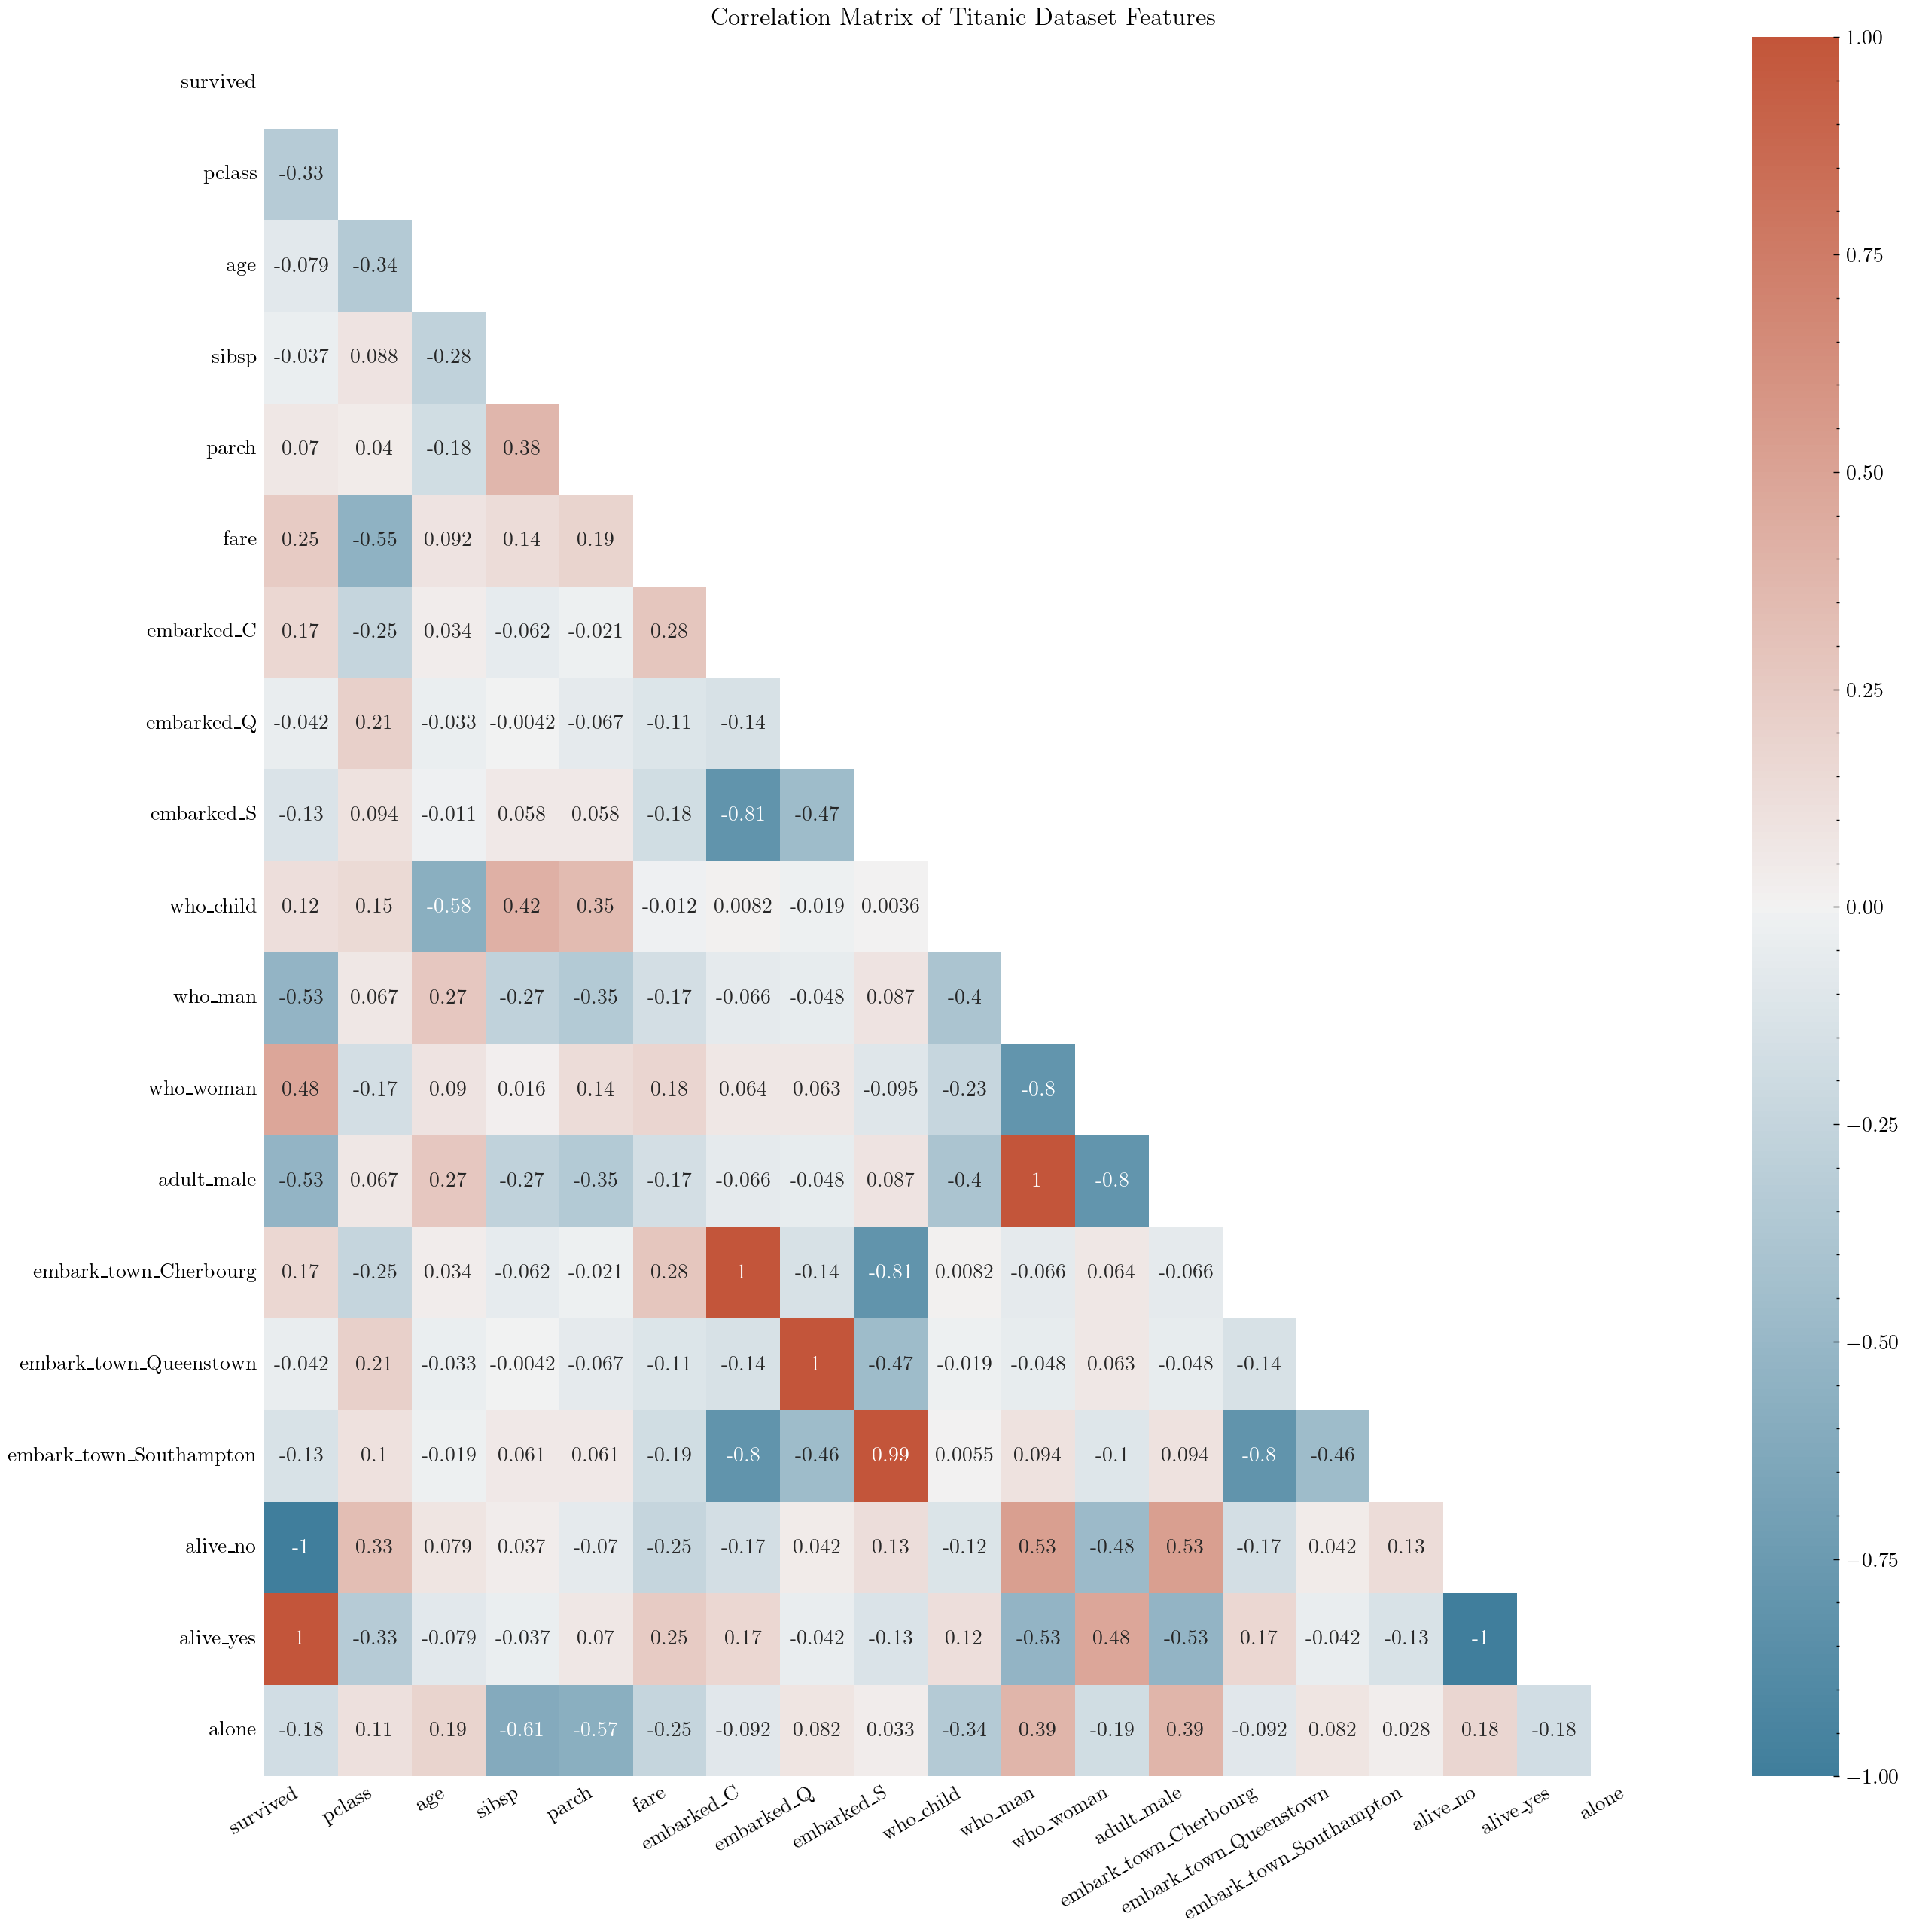

In [46]:
correlation(df_clean.corr(), annot=True, rotate=30, figsize=(15, 15), mask=True, title="Correlation Matrix of Titanic Dataset Features")

In [48]:
# cleanup perfectly correlated features
df_clean_2 = df_clean.drop(
    columns=[
        "embarked_C",
        "embarked_Q",
        "embarked_S",
        "who_man",
        "who_woman",
        "alive_yes",
        "alive_no",
    ]
)

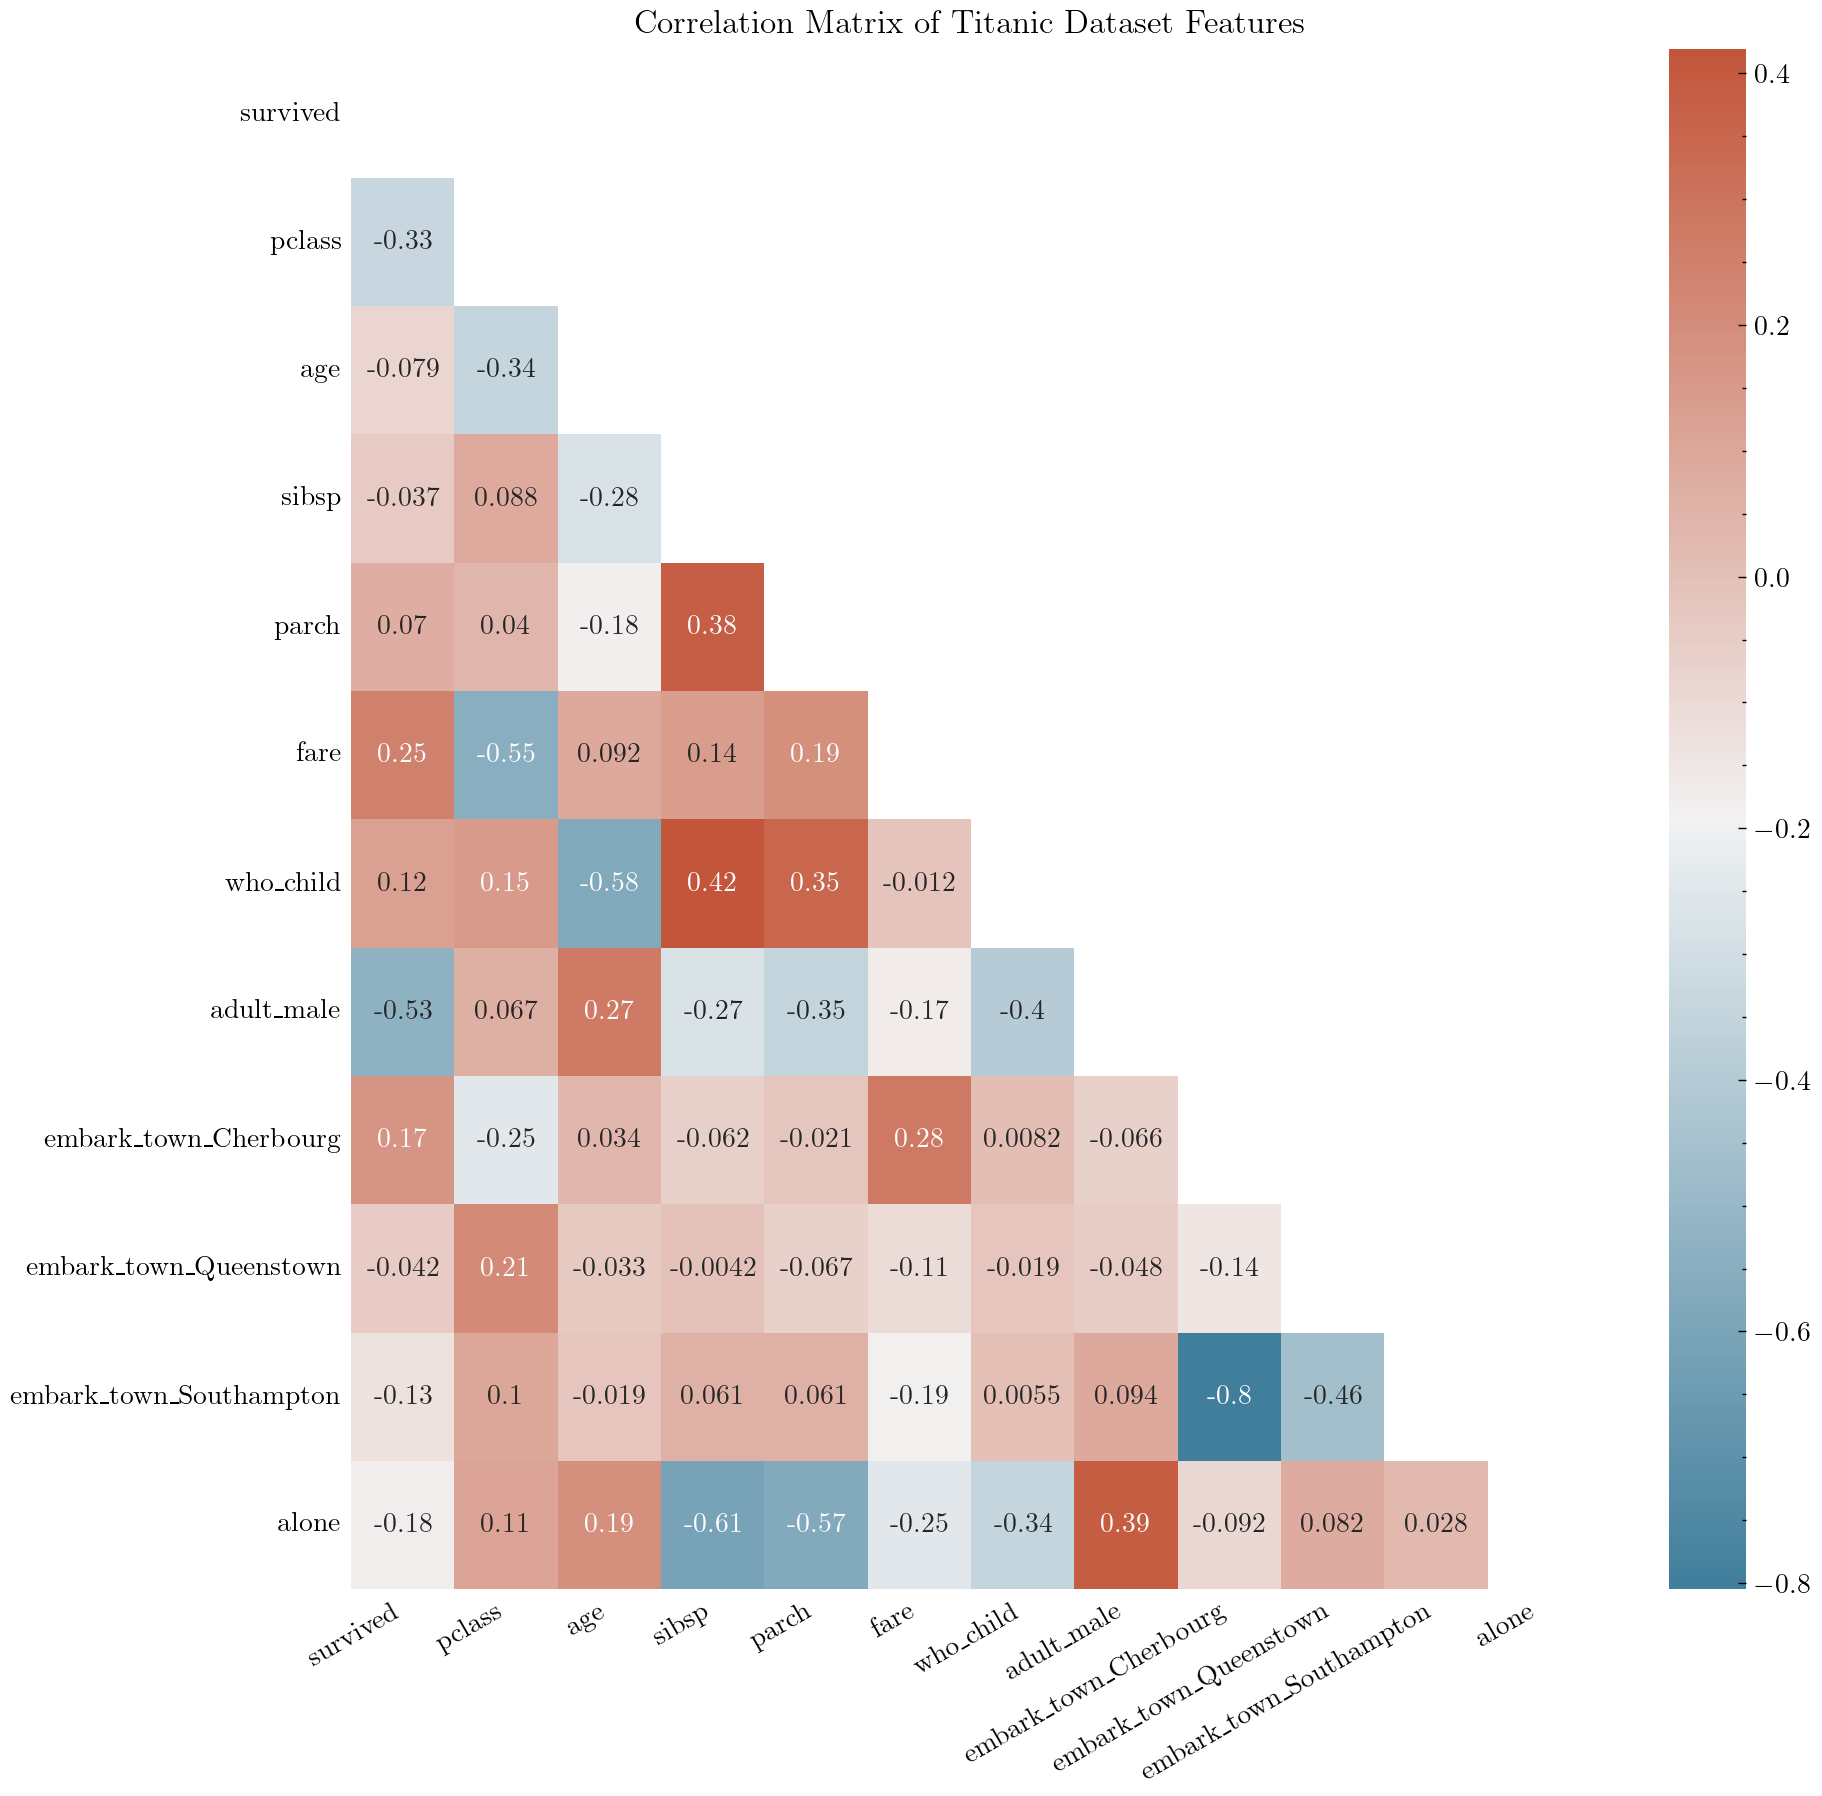

In [50]:
correlation(
    df_clean_2.corr(),
    annot=True,
    rotate=30,
    figsize=(10, 10),
    mask=True,
    title="Correlation Matrix of Titanic Dataset Features",
)

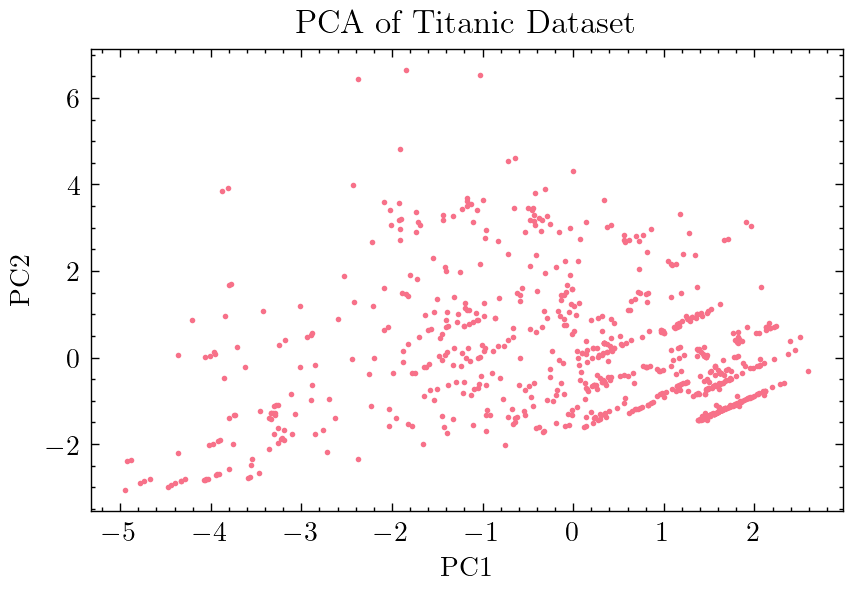

In [130]:

#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
# https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e?gi=a21114c712c8&sk=65bf5440e444c24aff192fedf9f8b64f&source=friends_link

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
dataset = df_clean_2.to_numpy() # (batch=784, feats=12)
dataset = StandardScaler().fit_transform(dataset)
principalComponents = pca.fit_transform(dataset)
plot(plt.scatter, *principalComponents.T, s=1, xlabel="PC1", ylabel="PC2", title="PCA of Titanic Dataset")

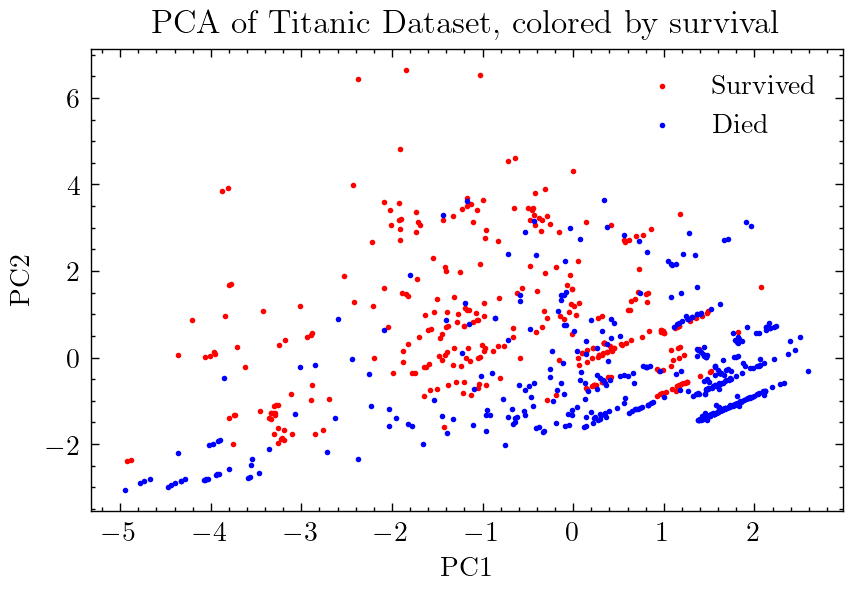

In [131]:
colors = np.array(['red', 'blue'])
survived = df_clean_2["survived"].astype(bool)
plot(
    plt.scatter,
    *principalComponents[survived].T,
    s=1,
    xlabel="PC1",
    ylabel="PC2",
    c=colors[0],    
    label="Survived"
)

plot(
    plt.scatter,
    *principalComponents[~survived].T,
    s=1,
    xlabel="PC1",
    ylabel="PC2",
    title="PCA of Titanic Dataset, colored by survival",
    c=colors[1],
    label="Died",
    legend=True
)

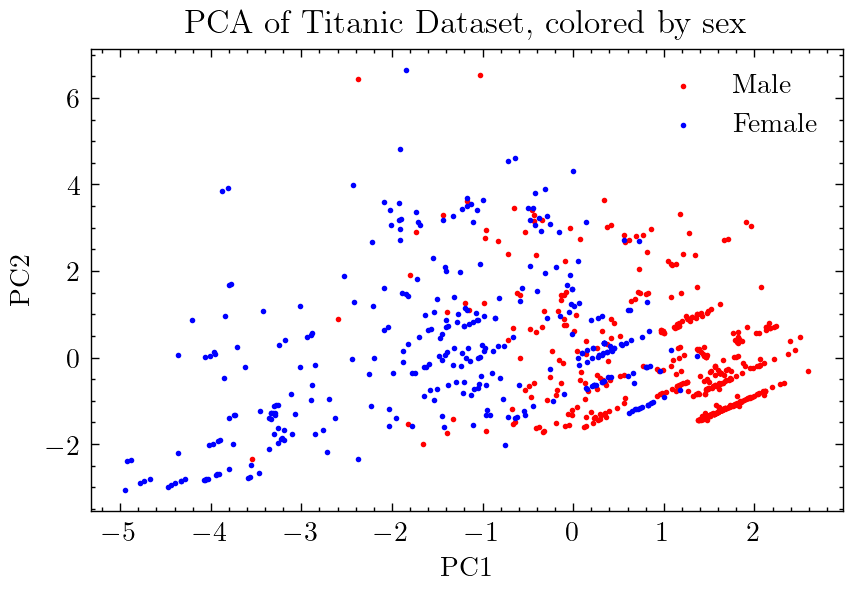

In [132]:
colors = np.array(["red", "blue"])
sex = df_clean_2["adult_male"].astype(bool)
plot(
    plt.scatter,
    *principalComponents[sex].T,
    s=1,
    xlabel="PC1",
    ylabel="PC2",
    c=colors[0],
    label="Male"
)

plot(
    plt.scatter,
    *principalComponents[~sex].T,
    s=1,
    xlabel="PC1",
    ylabel="PC2",
    title="PCA of Titanic Dataset, colored by sex",
    c=colors[1],
    label="Female",
    legend=True
)


- analysis of model prediction (confusion matrices, r2, loss curves, what else?)



In [134]:
np.set_printoptions(precision=4, suppress=True)
print('Explained variance of PC1, PC2:', pca.explained_variance_ratio_)
print("Total explained variance of first 2 PC:", pca.explained_variance_ratio_.sum())

Explained variance of PC1, PC2: [0.2519 0.195 ]
Total explained variance of first 2 PC: 0.4469118587138462


In [138]:
pca.components_

array([[-0.2284,  0.0432,  0.2866, -0.3851, -0.3851, -0.1941, -0.3924,
         0.4022, -0.0924,  0.0332,  0.0622,  0.4475],
       [ 0.2802, -0.4623,  0.2697, -0.1701, -0.089 ,  0.3959, -0.2028,
        -0.0617,  0.472 , -0.0178, -0.4164, -0.002 ]])

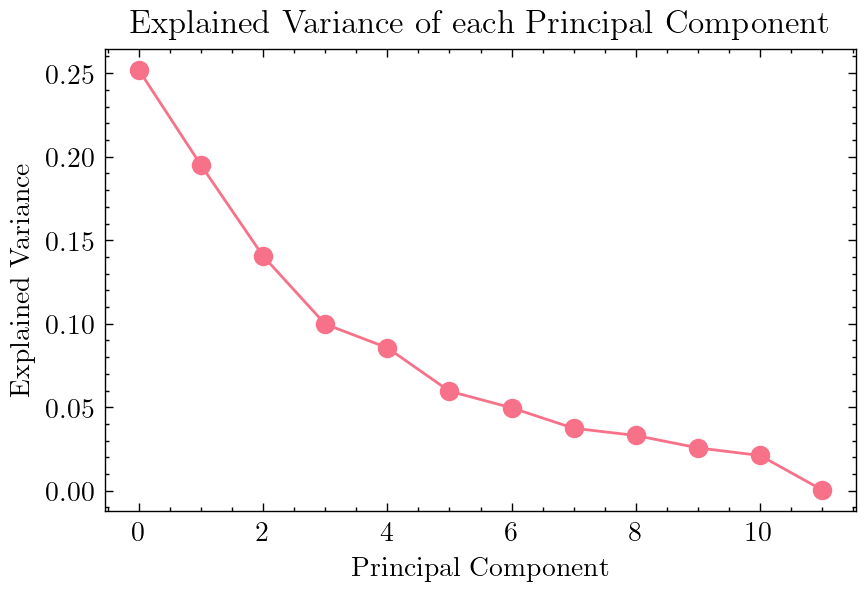

In [145]:
full_pca = PCA(n_components=12)
full_pca.fit_transform(dataset)

plot(plt.plot, full_pca.explained_variance_ratio_, marker='o', title="Explained Variance of each Principal Component", xlabel="Principal Component", ylabel="Explained Variance")


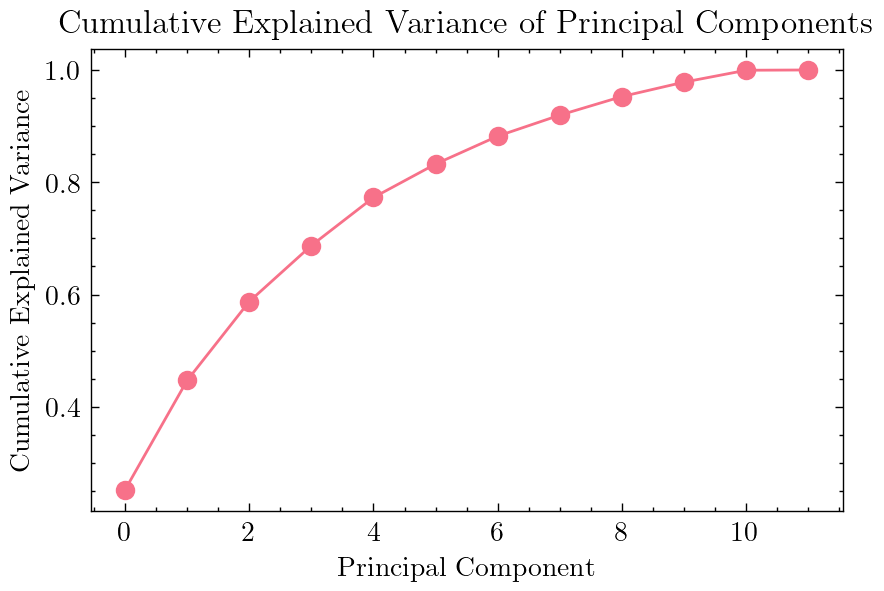

In [147]:
plot(plt.plot, np.cumsum(full_pca.explained_variance_ratio_), marker='o', title="Cumulative Explained Variance of Principal Components", xlabel="Principal Component", ylabel="Cumulative Explained Variance")